# EMERGENCY VEHICLE IDENTIFICATION

In [3]:
# Import Libraries
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Building a function that augment the data, Creates a model, train and predict emergency vehicles

In [4]:
def build_and_train_model(
    train_path,
    test_path,
    num_filters=32,
    batchsize=32,
    kernel_size=(3, 3),
    dropout_rate=0.5,
    learning_rate=0.001,
    epochs=20,
    image_size=(224, 224),
):
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Augments
    train_modifier = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        validation_split=0.2,
    )

    test_modifier = ImageDataGenerator(rescale=1.0 / 255)

    # Load datasets
    train_dataset = train_modifier.flow_from_directory(
        train_path,
        target_size=(32, 32),
        batch_size=batchsize,
        class_mode="binary",
        shuffle=True,
    )

    test_dataset = test_modifier.flow_from_directory(
        test_path,
        target_size=(32, 32),
        batch_size=batchsize,
        class_mode="binary",
        shuffle=False,
    )

    # Build the model
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    model.add(Conv2D(filters=num_filters, kernel_size=kernel_size, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=num_filters * 2, kernel_size=kernel_size, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=num_filters * 3, kernel_size=kernel_size, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model
    history = model.fit(
        train_dataset,
        epochs=epochs,
        validation_data=test_dataset,
        callbacks=[early_stopping],
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Predict
    y_pred = model.predict(test_dataset)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

    # Compute confusion matrix
    cm = confusion_matrix(test_dataset.classes, y_pred)

    # Print the confusion matrix
    print("\nConfusion Matrix:\n", cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Non-Emergency", "Emergency"],
        yticklabels=["Non-Emergency", "Emergency"],
    )
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(test_dataset.classes, y_pred, target_names=["Non-Emergency", "Emergency"]))

    # Training and validation accuracy plot
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Training and validation loss plot
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return history, cm


Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5563 - loss: 0.6919 - val_accuracy: 0.6926 - val_loss: 0.6158
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 876ms/step - accuracy: 0.6513 - loss: 0.6329 - val_accuracy: 0.7252 - val_loss: 0.5489
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 840ms/step - accuracy: 0.6768 - loss: 0.6037 - val_accuracy: 0.7210 - val_loss: 0.5329
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 877ms/step - accuracy: 0.7114 - loss: 0.5778 - val_accuracy: 0.7380 - val_loss: 0.5252
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 84s 915ms/step - accuracy: 0.7244 - loss: 0.5507 - val_accuracy: 0.7465 - val_loss: 0.5420
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 880ms/step - accuracy: 0.7291 - loss: 0.5546 - val_accuracy: 0.7691 - val_loss: 0.4969
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 45s 853ms/step - accuracy: 0.7652 - loss: 0.5274 - val_accuracy: 0.7734 - val_loss: 0.4767
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 48s 923ms/step - accuracy: 0.7647 - loss: 0.4951 - val_accurac

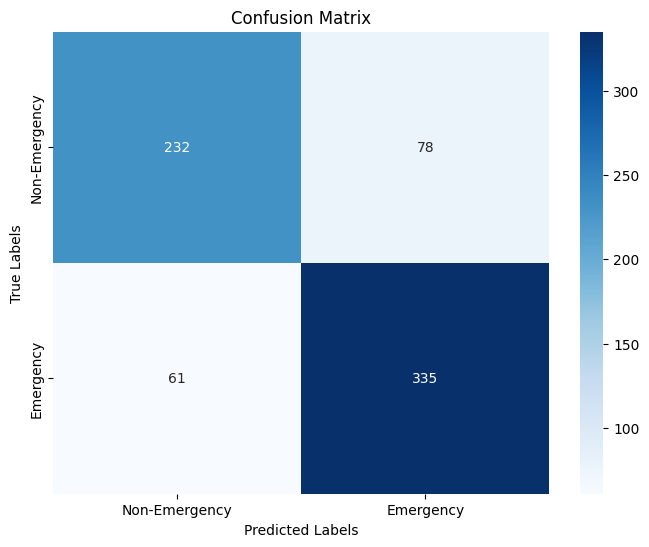


Classification Report:

               precision    recall  f1-score   support

Non-Emergency       0.79      0.75      0.77       310
    Emergency       0.81      0.85      0.83       396

     accuracy                           0.80       706
    macro avg       0.80      0.80      0.80       706
 weighted avg       0.80      0.80      0.80       706



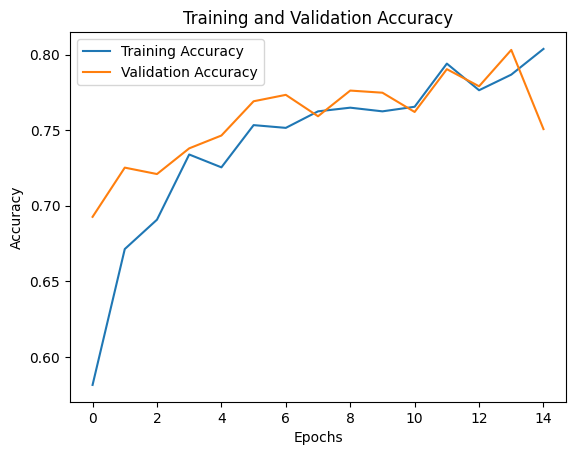

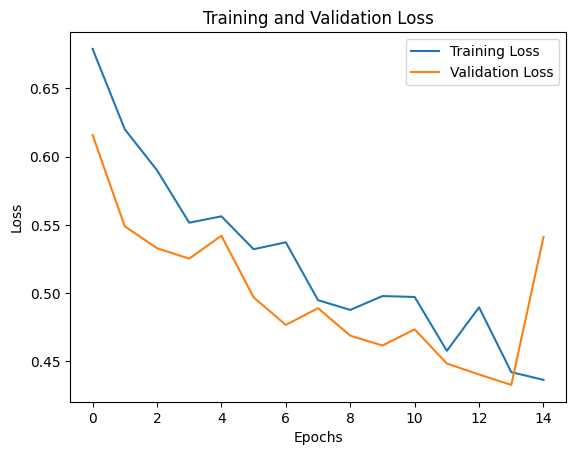

In [5]:
train_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\train"
test_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\test"

# hyperparameters
history, y_pred = build_and_train_model(
    train_path=train_dir,
    test_path=test_dir,
    num_filters=32,
    batchsize=32,
    kernel_size=(3, 3),
    dropout_rate=0.5,
    learning_rate=0.001,
    epochs=15
)


### Hyper parametertuning

Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.5474 - loss: 0.6877 - val_accuracy: 0.5609 - val_loss: 0.6681
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 50s 946ms/step - accuracy: 0.6151 - loss: 0.6572 - val_accuracy: 0.6246 - val_loss: 0.6429
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 51s 970ms/step - accuracy: 0.6522 - loss: 0.6370 - val_accuracy: 0.6983 - val_loss: 0.6031
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6724 - loss: 0.6335 - val_accuracy: 0.6997 - val_loss: 0.5792
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.6824 - loss: 0.6165 - val_accuracy: 0.7153 - val_loss: 0.5667
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6750 - loss: 0.6060 - val_accuracy: 0.7450 - val_loss: 0.5295
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7194 - loss: 0.5655 - val_accuracy: 0.7224 - val_loss: 0.5278
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 49s 935ms/step - accuracy: 0.7072 - loss: 0.5721 - val_accuracy: 0.7394 

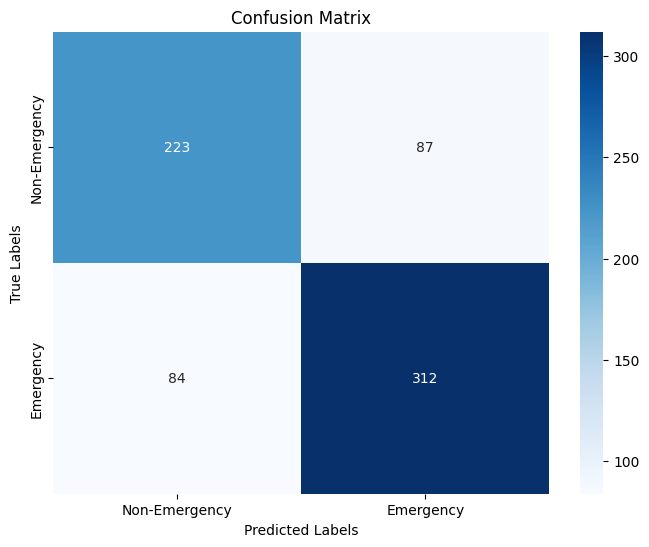


Classification Report:

               precision    recall  f1-score   support

Non-Emergency       0.73      0.72      0.72       310
    Emergency       0.78      0.79      0.78       396

     accuracy                           0.76       706
    macro avg       0.75      0.75      0.75       706
 weighted avg       0.76      0.76      0.76       706



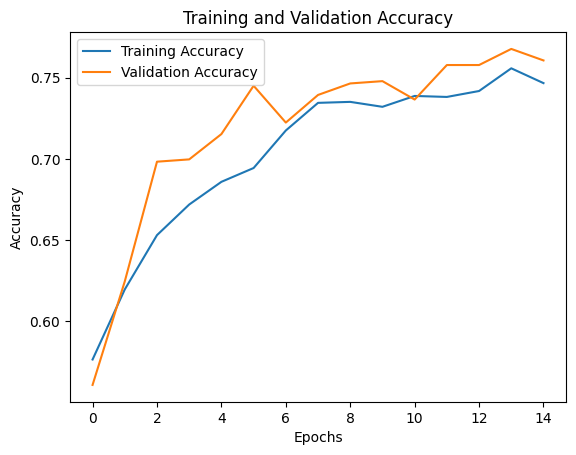

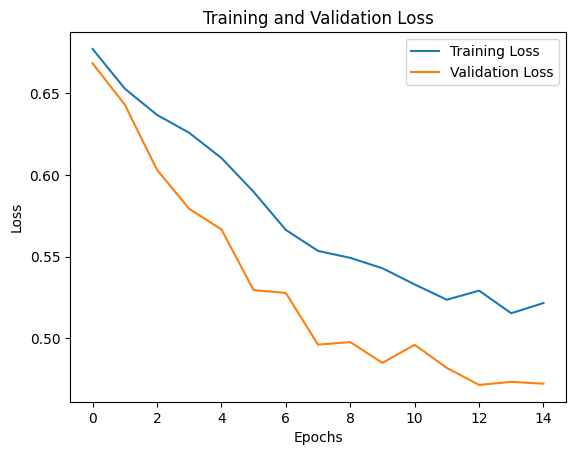

In [7]:
train_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\train"
test_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\test"

history, y_pred = build_and_train_model(
    train_path=train_dir,
    test_path=test_dir,
    num_filters=32,
    batchsize=32,
    kernel_size=(5, 5),#changed
    dropout_rate=0.5,
    learning_rate=0.0001,#changed
    epochs=15
)


In [ ]:
train_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\train"
test_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\test"

history, y_pred = build_and_train_model(
    train_path=train_dir,
    test_path=test_dir,
    num_filters=32,
    batchsize=64,#changed
    kernel_size=(5, 5),#changed
    dropout_rate=0.4,#changed
    learning_rate=0.0001,#changed
    epochs=15
)


Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5844 - loss: 0.6787 - val_accuracy: 0.5708 - val_loss: 0.6737
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5910 - loss: 0.6679 - val_accuracy: 0.6629 - val_loss: 0.6533
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6491 - loss: 0.6476 - val_accuracy: 0.6204 - val_loss: 0.6385
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6407 - loss: 0.6420 - val_accuracy: 0.6530 - val_loss: 0.6090
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6626 - loss: 0.6119 - val_accuracy: 0.7139 - val_loss: 0.5776
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6681 - loss: 0.6090 - val_accuracy: 0.6941 - val_loss: 0.6016
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7087 - loss: 0.5966 - val_accuracy: 0.6997 - val_loss: 0.5600
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7133 - loss: 0.5771 - val_accuracy: 0.7181 - val_loss:

In [ ]:
train_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\train"
test_dir = r"C:\Users\USER\Downloads\archive (1)\Emergency_Vehicles\test"

history, y_pred = build_and_train_model(
    train_path=train_dir,
    test_path=test_dir,
    num_filters=64,#changed
    batchsize=64,#changed
    kernel_size=(5, 5),#changed
    dropout_rate=0.4,#changed
    learning_rate=0.0001,#changed
    epochs=15
)
